In [1]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min



Attachin

In [2]:
#import data
all_counts = read.csv("combined_gene_counts.tsv", row.names='gene', sep='\t')
all_counts = round(all_counts)

## analyze with interaction term

In [3]:
#import experimental design
coldata <- read.csv('deseq_design.tsv', row.names='name', sep='\t')
coldata <- coldata[,c("genotype","condition")]
coldata$condition <- factor(coldata$condition)
coldata$genotype <- factor(coldata$genotype)
#test that all rows and columns in right order
all(rownames(coldata) == colnames(all_counts))
#define DESeq dataset with interaction between genotype and condition
dds <- DESeqDataSetFromMatrix(countData=all_counts, colData=coldata, design=~genotype + condition + genotype:condition)
dds$genotype <- relevel(dds$genotype, ref = "WT")
dds$condition <- relevel(dds$condition, ref = "UN")

[1] TRUE

converting counts to integer mode



In [4]:
#run differential expression test
dds <- DESeq(dds)
#names of the resulting comparisons
resultsNames(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"                      "genotype_EDF1_ko_vs_WT"        
[3] "condition_EM120_vs_UN"          "condition_EM30_vs_UN"          
[5] "genotypeEDF1_ko.conditionEM120" "genotypeEDF1_ko.conditionEM30"

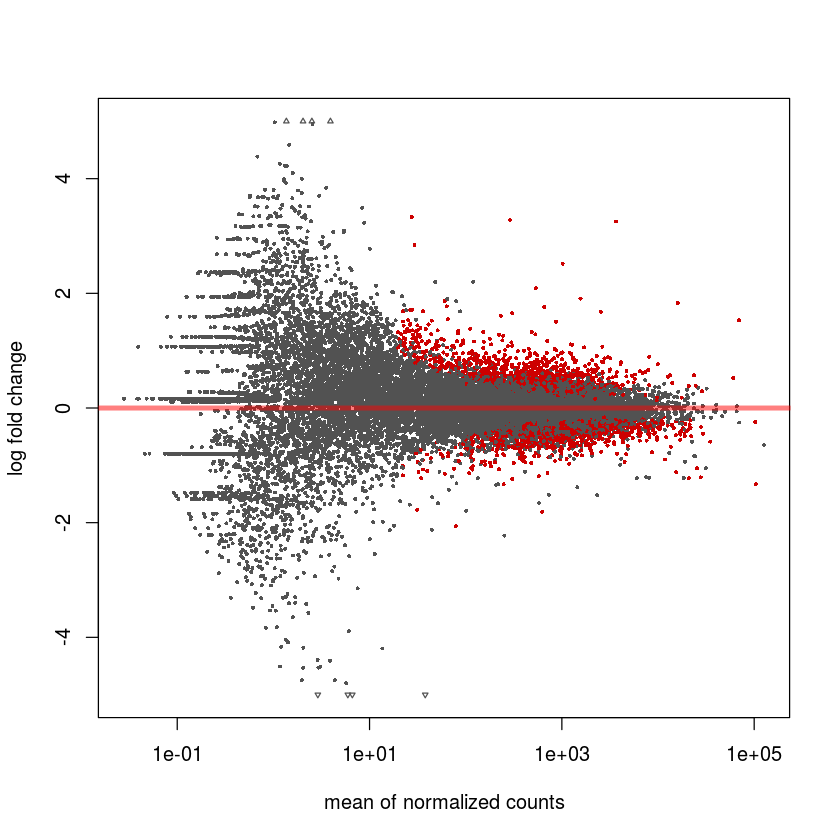

In [5]:
# the effect of 30 minute emetine treatment on WT
res <-results(dds, contrast=c("condition","EM30","UN"))
write.table(res,"deseq_results/EM30_vs_UN_inWT.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

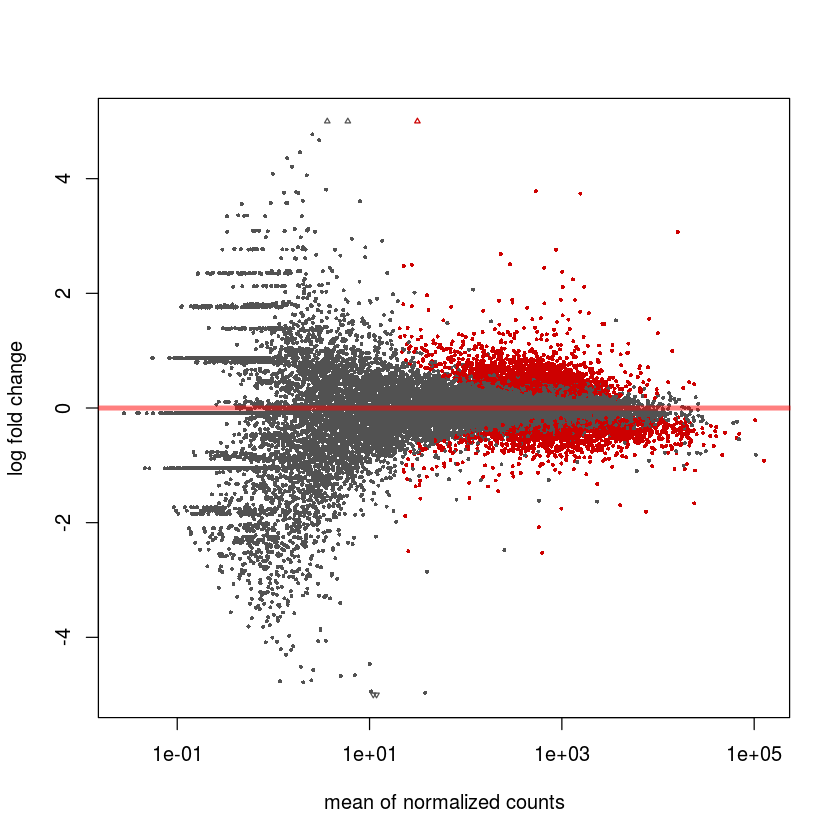

In [6]:
# the effect of 120 minute emetine treatment on WT
res <-results(dds, contrast=c("condition","EM120","UN"))
write.table(res,"deseq_results/EM120_vs_UN_inWT.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

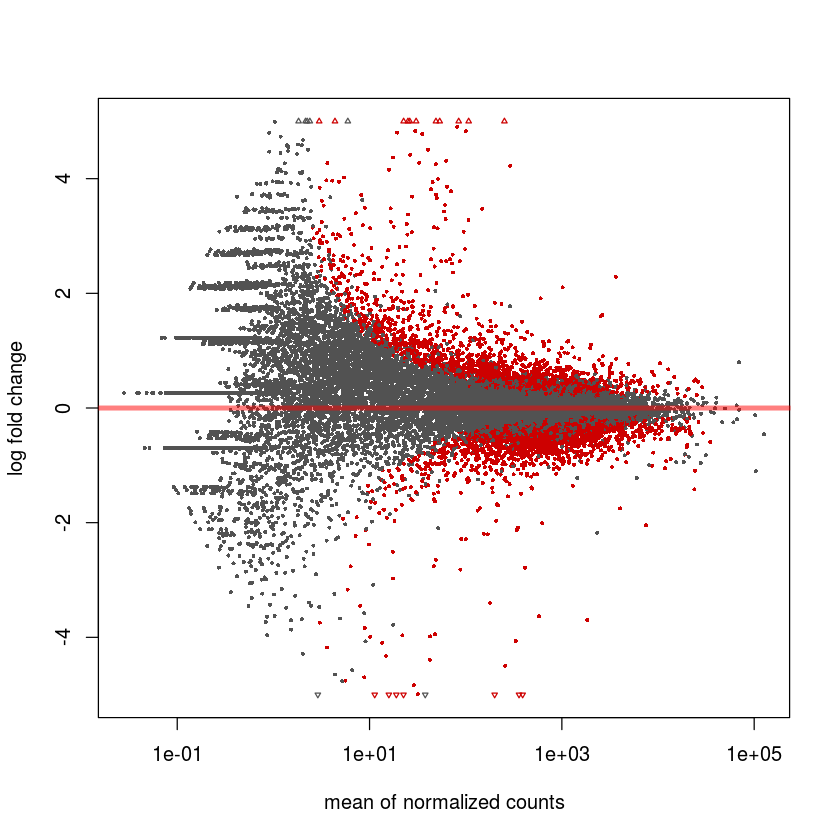

In [7]:
# the effect of EDF1 knockout
res <-results(dds, contrast=c("genotype","EDF1_ko","WT"))
write.table(res,"deseq_results/EDF1ko_vs_WT_inUN.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

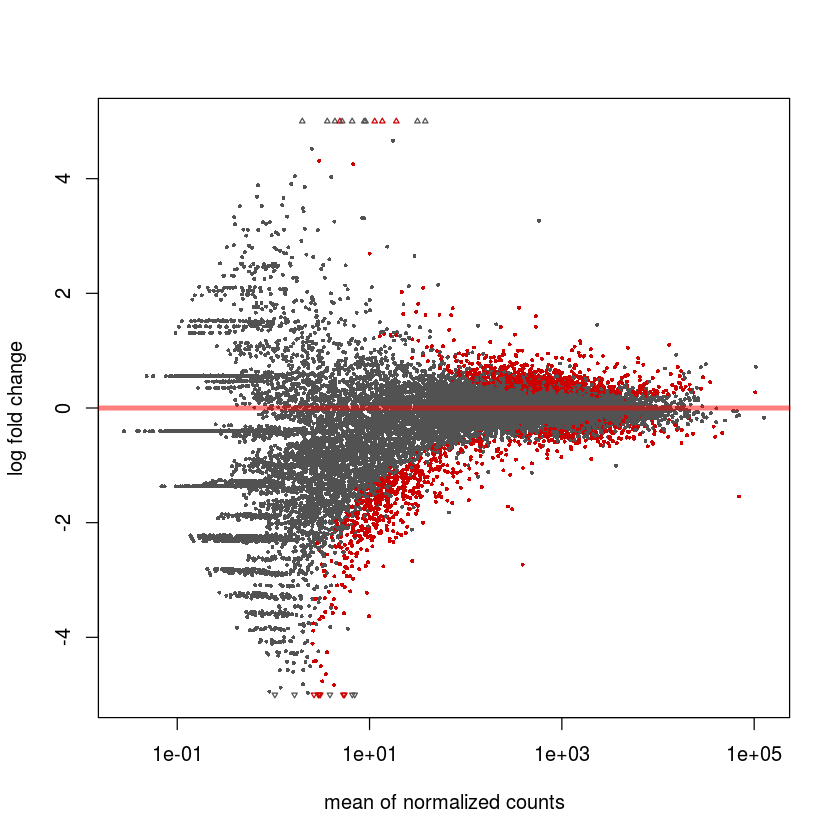

In [8]:
# the condition effect for EDF1_ko EM30
# this is the main effect *plus* the interaction term
# (the extra condition effect in EDF1_ko compared to WT).
res <-results(dds, contrast=list( c("condition_EM30_vs_UN","genotypeEDF1_ko.conditionEM30") ))
write.table(res,"deseq_results/EM30_vs_UN_inEDF1ko.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

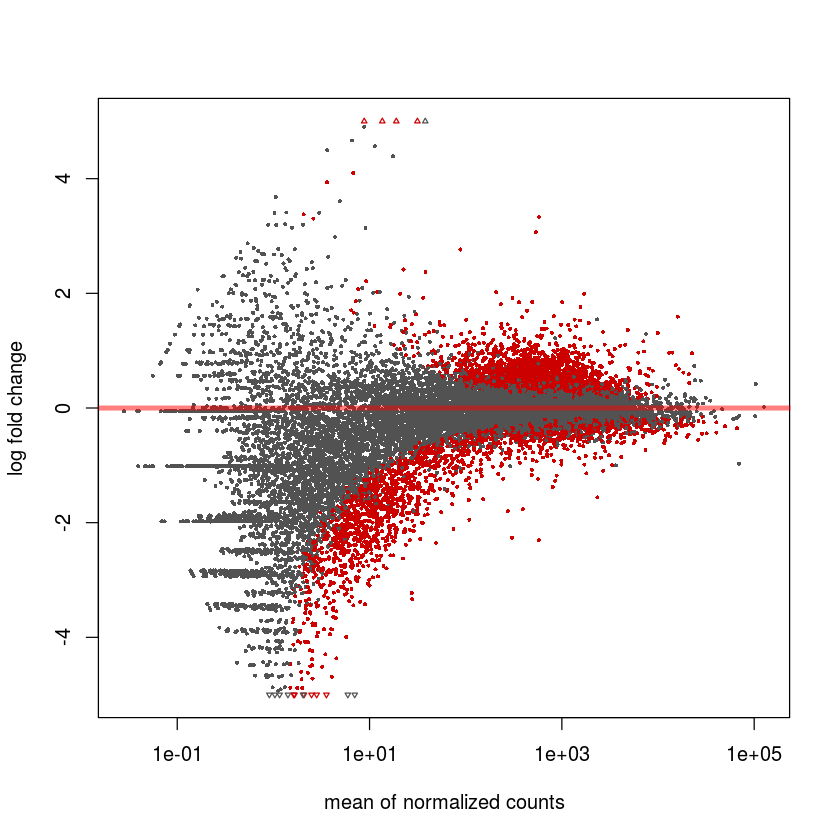

In [9]:
# the condition effect for EDF1_ko EM120
# this is the main effect *plus* the interaction term
# (the extra condition effect in EDF1_ko compared to WT).
res <-results(dds, contrast=list( c("condition_EM120_vs_UN","genotypeEDF1_ko.conditionEM120") ))
write.table(res,"deseq_results/EM120_vs_UN_inEDF1ko.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

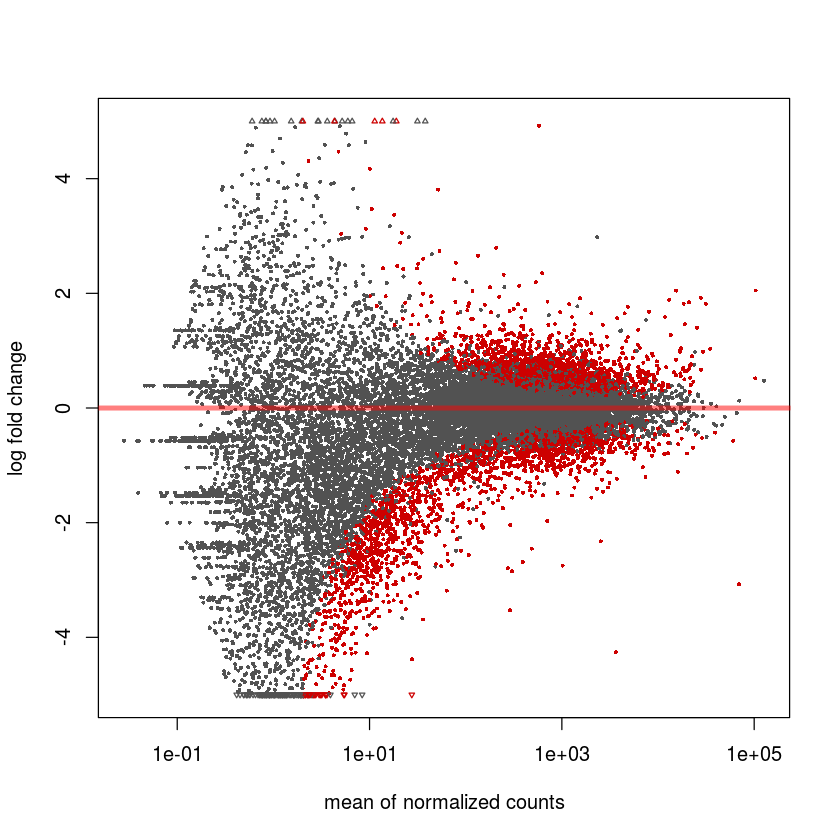

In [10]:
# the interaction term for condition effect in EDF1_ko compared to WT
# this tests if the condition effect (EM30) is different in EDF1_ko compared to WT
res <-results(dds, name="genotypeEDF1_ko.conditionEM30")
write.table(res,"deseq_results/EM30_vs_UN_EDF1ko_interaction.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

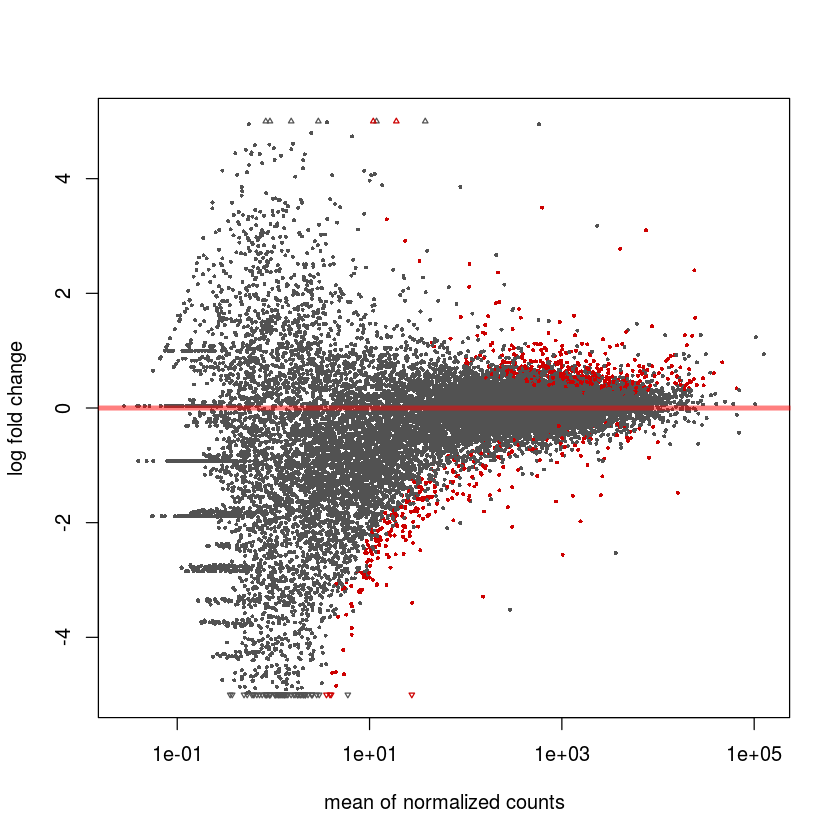

In [11]:
# the interaction term for condition effect in EDF1_ko compared to WT
# this tests if the condition effect (EM30) is different in EDF1_ko compared to WT
res <-results(dds, name="genotypeEDF1_ko.conditionEM120")
write.table(res,"deseq_results/EM120_vs_UN_EDF1ko_interaction.tsv", quote=F, sep='\t', col.names=NA)
plotMA(res, ylim=c(-5,5))

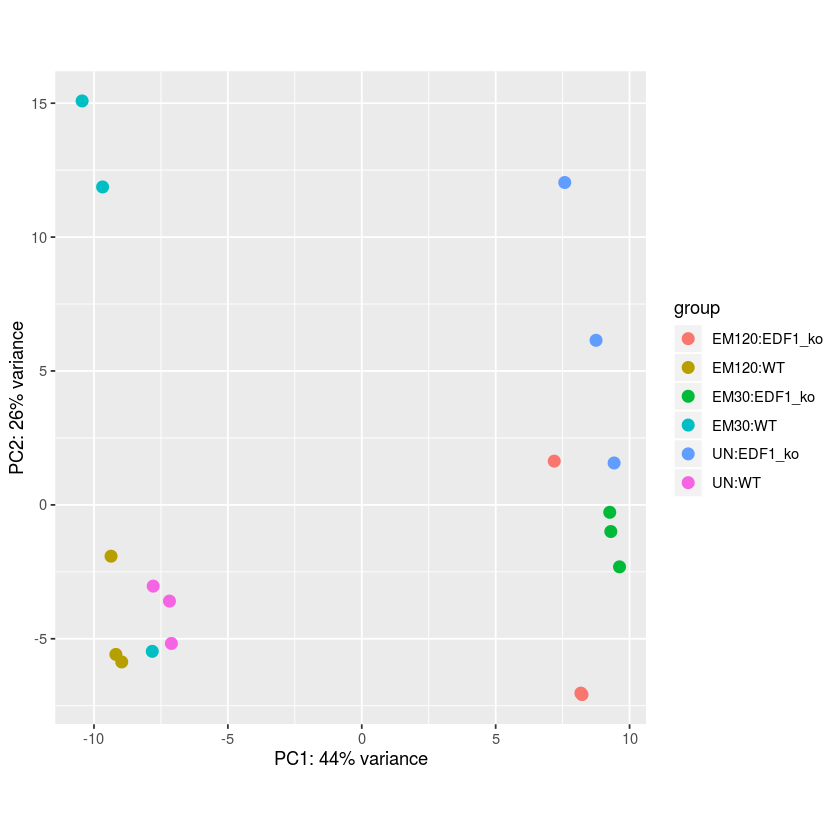

In [12]:
vsd <- vst(dds, blind=FALSE)
plotPCA(vsd, intgroup=c("condition", "genotype"))